#Подключение библиотек

In [ ]:
import pickle
import numpy as np
import pandas as pd
import statistics as st
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
import sklearn
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


#Предобработка и анализ данных

##Загрузка и просмотр данных

Чтение датасета из csv файла на google диске

In [ ]:
df = pd.read_csv(
    '/content/drive/MyDrive/moldova_cars_task.csv',
    sep=',',
    encoding='utf-8',
    index_col=None
)

Просмотр информации о датасете

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41007 entries, 0 to 41006
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Make                  41007 non-null  object 
 1   Model                 40671 non-null  object 
 2   Year                  40771 non-null  float64
 3   Style                 40938 non-null  object 
 4   Distance              40889 non-null  float64
 5   Engine_capacity(cm3)  41007 non-null  float64
 6   Fuel_type             41007 non-null  object 
 7   Transmission          40779 non-null  object 
 8   Price(euro)           41007 non-null  float64
dtypes: float64(4), object(5)
memory usage: 2.8+ MB


Несколько первых и последних значений из набора данных

In [ ]:
df

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro)
0,Toyota,Prius,2011.0,Hatchback,195000.0,1800.0,Hybrid,Automatic,7750.0
1,Renault,Grand Scenic,2014.0,Universal,135000.0,1500.0,Diesel,Manual,8550.0
2,Volkswagen,Golf,1998.0,Hatchback,1.0,1400.0,Petrol,Manual,2200.0
3,Renault,Laguna,2012.0,Universal,110000.0,1500.0,Diesel,Manual,6550.0
4,Opel,Astra,2006.0,Universal,200000.0,1600.0,Metan/Propan,Manual,4100.0
...,...,...,...,...,...,...,...,...,...
41002,Dacia,NaN,2015.0,Universal,89000.0,1500.0,Diesel,Manual,7000.0
41003,Renault,Modus,2009.0,Hatchback,225.0,1500.0,Diesel,Manual,4500.0
41004,Mercedes,E Class,2016.0,Sedan,50000.0,1950.0,Diesel,Automatic,29500.0
41005,Mazda,6,2006.0,Combi,370000.0,2000.0,Diesel,Manual,4000.0


Просмотр описательной статистики датасета

In [ ]:
df.describe()

,Year,Distance,Engine_capacity(cm3),Price(euro)
count,40771.000000,4.088900e+04,41007.000000,4.100700e+04
mean,2007.979152,4.571171e+05,1853.856732,9.727109e+03
std,8.246369,4.457945e+06,700.364532,5.043926e+04
min,1900.000000,0.000000e+00,0.000000,1.000000e+00
25%,2004.000000,8.700000e+04,1500.000000,3.500000e+03
50%,2009.000000,1.680000e+05,1800.000000,6.600000e+03
75%,2014.000000,2.300000e+05,2000.000000,1.215000e+04
max,2021.000000,1.000000e+08,9999.000000,1.000000e+07


from matplotlib import pyplot as plt
_df_0['Year'].plot(kind='hist', bins=20, title='Year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Distance'].plot(kind='hist', bins=20, title='Distance')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Engine_capacity(cm3)'].plot(kind='hist', bins=20, title='Engine_capacity(cm3)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Price(euro)'].plot(kind='hist', bins=20, title='Price(euro)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('index').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Year', y='Distance', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Distance', y='Engine_capacity(cm3)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Engine_capacity(cm3)', y='Price(euro)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Distance']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('Year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('index')):
  _plot_series(series, series_name, i)
  fig.legend(title='index', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Distance')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Engine_capacity(cm3)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('Year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('index')):
  _plot_series(series, series_name, i)
  fig.legend(title='index', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Engine_capacity(cm3)')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Price(euro)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('Year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('index')):
  _plot_series(series, series_name, i)
  fig.legend(title='index', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Price(euro)')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Year']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Year'}, axis=1)
              .sort_values('Year', ascending=True))
  xs = counted['Year']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('Year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('index')):
  _plot_series(series, series_name, i)
  fig.legend(title='index', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_12['Year'].plot(kind='line', figsize=(8, 4), title='Year')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['Distance'].plot(kind='line', figsize=(8, 4), title='Distance')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Engine_capacity(cm3)'].plot(kind='line', figsize=(8, 4), title='Engine_capacity(cm3)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Price(euro)'].plot(kind='line', figsize=(8, 4), title='Price(euro)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_16['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_16, x='Year', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='Distance', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_18['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_18, x='Engine_capacity(cm3)', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='Price(euro)', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

Просмотр описания аттрибутов

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41007 entries, 0 to 41006
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Make                  41007 non-null  object 
 1   Model                 40671 non-null  object 
 2   Year                  40771 non-null  float64
 3   Style                 40938 non-null  object 
 4   Distance              40889 non-null  float64
 5   Engine_capacity(cm3)  41007 non-null  float64
 6   Fuel_type             41007 non-null  object 
 7   Transmission          40779 non-null  object 
 8   Price(euro)           41007 non-null  float64
dtypes: float64(4), object(5)
memory usage: 2.8+ MB


Проверка количества уникальных данных в столбцах

In [ ]:
df.nunique()

Make                      87
Model                    829
Year                      75
Style                     12
Distance                8913
Engine_capacity(cm3)     724
Fuel_type                  6
Transmission               2
Price(euro)             1824
dtype: int64

Матрица корреляций

<Axes: >

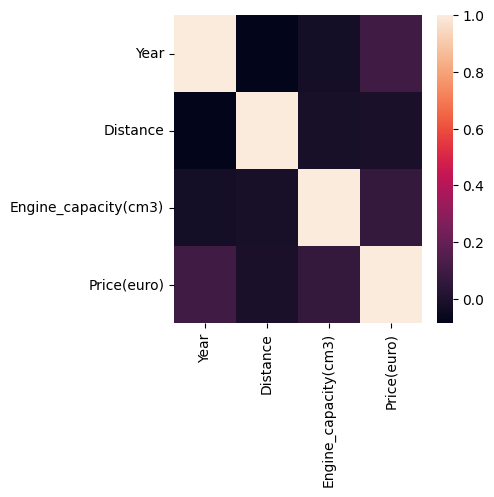

In [ ]:
numeric_cols = [
    'Year',
    'Distance',
    'Engine_capacity(cm3)',
    'Price(euro)'


]
df_numeric = df[numeric_cols].dropna()
ax, fig = plt.subplots(figsize=[4,4])
sns.heatmap(df_numeric.corr())

Проверка данных на пропуски

In [ ]:
def CheckNA():
  sm = df.isna().sum().sum()
  print("Пропущено значений: ", sm)
  print('Заполнение пропусков не требуется\n') if sm==0 else print('Требуется заполнение пропусков\n')
  print(df.isna().sum())

CheckNA()

Пропущено значений:  987
Требуется заполнение пропусков

Make                      0
Model                   336
Year                    236
Style                    69
Distance                118
Engine_capacity(cm3)      0
Fuel_type                 0
Transmission            228
Price(euro)               0
dtype: int64


Как видим в датасете 987 пропусков, которые находятся в 5 столбцах.

##Заполнение пропусков

Заполнение пропусков в столбцах: модель, год, кузов, дистанция, трансмиссия. Столбцы модель, кузов и трансмиссия заполняются модой, так как являются текстовыми и не могут иметь среднего арифметического или медианы. Столбец год заполняется средним арифметическим. Столбец дистанции медианой, так как имеет большую разницу между максимальным и минимальным, что может привести к некорректному предсказанию.

In [ ]:
modeModel = st.mode(df.Model.dropna())
avgYear = np.round(np.mean(df.Year.dropna()))
modeStyle = st.mode(df.Style.dropna())
medianDist = np.round(np.median(df.Distance.dropna()))
modeTransmission = st.mode(df.Transmission.dropna())

df.fillna({
    'Model': modeModel,
    'Year':avgYear,
    'Style': modeStyle,
    'Distance': medianDist,
    'Transmission': modeTransmission
}, inplace=True)

Повторная проверка на пропуски

In [ ]:
CheckNA()

Пропущено значений:  0
Заполнение пропусков не требуется

Make                    0
Model                   0
Year                    0
Style                   0
Distance                0
Engine_capacity(cm3)    0
Fuel_type               0
Transmission            0
Price(euro)             0
dtype: int64


Как видим пропусков не осталось

##Построение графиков

Удаление значительных выбросов в цене, которые были обнаружены с помощью графиков ниже

In [ ]:
df = df[df['Price(euro)']<300000]

Построение графиков

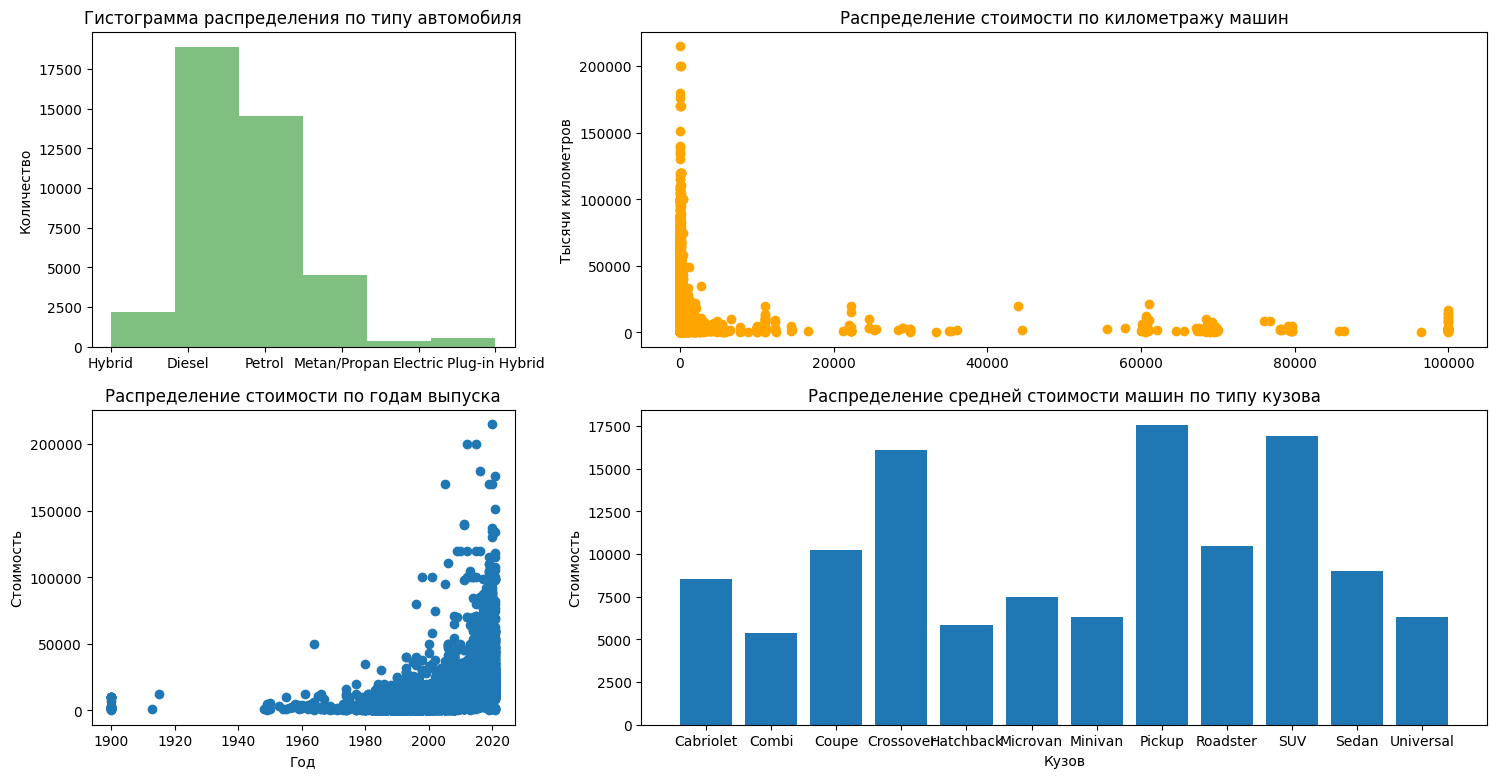

In [ ]:
fig, arr = plt.subplots(ncols=2, nrows=2, figsize=(18,9), gridspec_kw={'width_ratios': [1, 2]})

arr[0, 0 eat].hist(df.Fuel_type, color='g', alpha=0.5, bins=6)
arr[0, 1].scatter(list(map(lambda x: x/1000, df.Distance)), df['Price(euro)'], color='orange')
arr[1, 0].scatter(df.Year, df['Price(euro)'])
pricebystyle = [np.mean(df[df.Style==i]['Price(euro)']) for i in np.unique(df.Style)]
arr[1, 1].bar(np.unique(df.Style), pricebystyle)

arr[0, 0].set_title("Гистограмма распределения по типу автомобиля")
arr[0, 0].set_ylabel("Количество")

arr[0, 1].set_title("Распределение стоимости по километражу машин")
arr[0, 1].set_ylabel("Тысячи километров")

arr[1, 0].set_title("Распределение стоимости по годам выпуска")
arr[1, 0].set_xlabel("Год")
arr[1, 0].set_ylabel("Стоимость")

arr[1, 1].set_title("Распределение средней стоимости машин по типу кузова")
arr[1, 1].set_xlabel("Кузов")
arr[1, 1].set_ylabel("Стоимость")

print()

- гистограмма распределения по типу автомобиля. Как можем видеть из гистограммы, наибольшее число машин содержит дизельный двигатель.
- распределение по километражу машин. Можем заметить, что чем выше пройденный километраж, тем ниже стоимость авто. Однако стоит заметить, что при низком километраже, стоимость авто оченб разница.
- распределение стоимости по годам выпуска. Здесь идентично, чем новее авто, теи  выше его стоимость.
- распределение средней стоимости машин по типу кузова. Можем видеть, что наибольшей средней стоимостью, обладают авто с кузовом типа "пикап", а самым недорогим - "комби".

##Преобразование столбцов в целочисленные

Конвертируем столбцы с типом данных float в int

In [ ]:
df.Year = df.Year.astype("int32")
df.Distance = df.Distance.astype("int32")
df['Engine_capacity(cm3)'] = df['Engine_capacity(cm3)'].astype("int32")
df['Price(euro)'] = df['Price(euro)'].astype("int32")

<ipython-input-15-499b6ef4c8bd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Year = df.Year.astype("int32")
<ipython-input-15-499b6ef4c8bd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Distance = df.Distance.astype("int32")
<ipython-input-15-499b6ef4c8bd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

Удаление стобца модель, так как он содержит слишком много уникальных значений. Преобразование нечисловвых данных, путём порождения новых колонок.

In [ ]:
df.drop(columns="Model", axis=1, inplace=True)
df = pd.get_dummies(df, columns=["Make", "Style", "Fuel_type", "Transmission"])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41005 entries, 0 to 41006
Columns: 111 entries, Year to Transmission_Manual
dtypes: int32(4), uint8(107)
memory usage: 5.1 MB
None


<ipython-input-16-9461560c67f3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns="Model", axis=1, inplace=True)


##Сохранение набора данных

In [ ]:
df.to_csv(
    '/content/drive/MyDrive/moldova_cars_preprocessed.csv',
    sep=',',
    index=False
)

#Моделирование

##Подготовка набора данных к обучению

Загрузка набора данных

In [ ]:
df = pd.read_csv(
    '/content/drive/MyDrive/moldova_cars_preprocessed.csv',
    sep=',',
    encoding='UTF-8',
    index_col=None
)

In [ ]:
df

,Year,Distance,Engine_capacity(cm3),Price(euro),Make_ARO,Make_Abarth,Make_Acura,Make_Alfa Romeo,Make_Alta marca,Make_Aston Martin,...,Style_Sedan,Style_Universal,Fuel_type_Diesel,Fuel_type_Electric,Fuel_type_Hybrid,Fuel_type_Metan/Propan,Fuel_type_Petrol,Fuel_type_Plug-in Hybrid,Transmission_Automatic,Transmission_Manual
0,2011,195000,1800,7750,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,2014,135000,1500,8550,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,1
2,1998,1,1400,2200,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,2012,110000,1500,6550,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,1
4,2006,200000,1600,4100,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41000,2015,89000,1500,7000,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,1
41001,2009,225,1500,4500,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
41002,2016,50000,1950,29500,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
41003,2006,370000,2000,4000,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


Отделение целевого столбца и разделение на обучающую и тестирующую выборки

In [ ]:
y = df['Price(euro)']
x = df.drop(columns='Price(euro)')
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

Масштабирование данных

In [ ]:
scal = StandardScaler()
X_train = scal.fit_transform(X_train)
X_test = scal.transform(X_test)
X_train


array([[ 0.49482133, -0.0647656 , -0.64606206, ..., -0.11152528,
         1.11325367, -1.11325367],
       [-1.08324569, -0.10144046, -0.35912564, ..., -0.11152528,
        -0.89826786,  0.89826786],
       [ 0.98038041, -0.07784737,  0.21187785, ..., -0.11152528,
         1.11325367, -1.11325367],
       ...,
       [ 0.00926224, -0.10134866, -0.35912564, ..., -0.11152528,
        -0.89826786,  0.89826786],
       [-2.53992294, -0.03309395,  0.21474721, ..., -0.11152528,
        -0.89826786,  0.89826786],
       [-1.32602524, -0.10185357,  0.50168364, ..., -0.11152528,
        -0.89826786,  0.89826786]])

Метод вывода регрессионных метрик

In [ ]:
def PrintRegressionMetrics(model):
  print("Коэффициент детерминации:", model.score(X_test, y_test))
  print("MAE:", mean_absolute_error(y_test, model.predict(X_test)))
  print("MSE:", mean_squared_error(y_test, model.predict(X_test)))

##Линейная регрессия с регуляризацией L1 (Lasso)

Создание и обучение модели Lasso по умолчанию

In [ ]:
lrl = Lasso().fit(X_train, y_train)
PrintRegressionMetrics(lrl)

Коэффициент детерминации: 0.5103615699358528
MAE: 3638.3904366119864
MSE: 47768188.90239027


Результат работы модели сильно зависит от начальной обучающей выборки и может разница от сильно отрицательных до 0.5. Подбор гиперпараметров сводит результаты этой работы к нулю.

In [ ]:
parameters = {'alpha': [1, 5, 10, 25], 'fit_intercept': [True, False]}
lrloptimal = GridSearchCV(Lasso(), parameters).fit(X_train, y_train)
print(lrloptimal.best_params_)

{'alpha': 10, 'fit_intercept': True}


Вывод метрик для модели с оптимальными параметрами

In [ ]:
PrintRegressionMetrics(lrloptimal)

Коэффициент детерминации: 0.5103437902094079
MAE: 3632.8079990608335
MSE: 47769923.4585021


Результат модели с этими параметрами плох. Не смотря на то, что нам удалось свести коэффициент детерминации почти к нулю, это всё ещё отрицательный показатель. Метод линейной регрессии с регуляризацией L1 очевидно не подходит.

##Линейная регрессия с регуляризацией L2 (Ridge)

Создание и обучение модели Ridge по умолчанию

In [ ]:
lrr = Ridge().fit(X_train, y_train)
PrintRegressionMetrics(lrr)

Коэффициент детерминации: 0.5103658243030771
MAE: 3639.042685565017
MSE: 47767773.854459494


Результат этой модели почти соответствует результату модели Lasso.

In [ ]:
parameters = {'alpha': [1, 5, 10, 25], 'fit_intercept': [True, False]}
lrroptimal = GridSearchCV(Ridge(), parameters).fit(X_train, y_train)
print(lrroptimal.best_params_)

{'alpha': 25, 'fit_intercept': True}


In [ ]:
PrintRegressionMetrics(lrroptimal)

Коэффициент детерминации: 0.510367201388271
MAE: 3638.613032047526
MSE: 47767639.50866137


Не смотря на такое несоответствие в моделе по умолчанию, модель Ridge с отпимальными параметрами, смогла не только свестись к нулю, но и достигнуть определённого результата, который также независим от начальной выборки.

##Дерево решений (DecisionTreeRegressor)

Создание и обучение модели DecisionTreeRegressor по умолчанию

In [ ]:
dtr = DecisionTreeRegressor().fit(X_train, y_train)
PrintRegressionMetrics(dtr)

Коэффициент детерминации: 0.6730828867444661
MAE: 2270.6395486041993
MSE: 31893408.40621636


Здесь тоже результат сильно зависит от обучающей выборки, только теперь результат разница от отрицательных до 0.7

In [ ]:
# parameters = {'criterion': ["absolute_error"], 'min_samples_leaf': [1, 3, 5], 'min_samples_split': [2, 3, 4], 'max_features': [None, 1, 2]}
# dtroptimal = GridSearchCV(DecisionTreeRegressor(), parameters).fit(X_train, y_train)
# print(dtroptimal.best_params_)

Запись подобранных параметров, по причине их долгого подбора

In [ ]:
dtroptimal = DecisionTreeRegressor(criterion='absolute_error', max_features=None, min_samples_leaf=5, min_samples_split=3).fit(X_train, y_train )

In [ ]:
PrintRegressionMetrics(dtroptimal)

Коэффициент детерминации: 0.7423279014446116
MAE: 2114.84879892696
MSE: 25137997.189184245


После подбора гиперпараметров был получен независимый от разделения выборки результат, он в некоторой степени удовлетворяет нашему запросу. Если в дальнейшем не будет полученого лучшего результата, возьмём эту модель.

##Бэггинг на основе ансамбля деревьев (BaggingRegressor)

Создание и обучение модели BaggingRegressor по умолчанию

In [ ]:
br = BaggingRegressor ().fit(X_train, y_train)
PrintRegressionMetrics(br)

Коэффициент детерминации: 0.7996913990405992
MAE: 1913.3570510588245
MSE: 19541724.059830487


In [ ]:
parameters = {'n_estimators': [10, 12, 15], 'max_features': [1, 2, 3], 'max_samples': [1, 2, 3]}
broptimal = GridSearchCV(BaggingRegressor(), parameters).fit(X_train, y_train)
print(broptimal.best_params_)

{'max_features': 2, 'max_samples': 2, 'n_estimators': 12}


In [ ]:
PrintRegressionMetrics(broptimal)

Коэффициент детерминации: -0.03268288753770143
MAE: 5827.655738121368
MSE: 100746567.71059445


Не стоит менять гиперпараметры, так как модель переобучается. Используя параметры по умолчанию, был получен наилучший результат.

##Полносвязная нейронная сеть

Создание нейронной сети

In [ ]:
model_regression = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(128, activation="relu", input_shape=(110,)),
        tf.keras.layers.Dense(64, activation="linear"),
        tf.keras.layers.Dropout(0.05),
        tf.keras.layers.Dense(32, activation="relu"),
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.Dense(16, activation="relu"),
        tf.keras.layers.Dense(1, activation="linear"),
    ]
)
model_regression.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               14208     
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 1)                 1

Обучение

In [ ]:
model_regression.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss="mse")
model_regression.fit(X_train, y_train, epochs=50, verbose=None)

Вывод метрик

In [ ]:
print("MAE:", mean_absolute_error(y_test, model_regression.predict(X_test)))
print("MSE:", mean_squared_error(y_test, model_regression.predict(X_test)))

257/257 [==============================] - 0s 1ms/step
MAE: 2339.208145603961
257/257 [==============================] - 0s 1ms/step
MSE: 21731094.119048044


Судя по метрикам, нейросеть достигла лучшего результата чем остальные. Поэтому её мы и будем использовать в дальнейшем.

##Сохранение модели

Сравнив результаты работы всех моделей наилучшую модель сохраняем на диск.

In [ ]:
pickle.dump(br, open('/content/drive/MyDrive/Models/model.sav', 'wb'))

# Дашборд

Установка зависимостей

In [ ]:
!pip install -q numpy pandas scikit-learn streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 55.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.4 MB/s eta 0:00:00


Ссылки на сохранённые данные и модель на google-диске.

In [ ]:
data_path = "https://drive.google.com/file/d/1sP4AyBXVrxhiTszEavBNfDxI0o40yFCm/view?usp=sharing"
model_path = "https://drive.google.com/file/d/1lgwDjjFjIF4FlL_JSF9E7fiF7ShwbO7D/view?usp=sharing"

In [ ]:
import os


id_slice = slice(32, 65)

data_file_id = data_path[id_slice]
model_file_id = model_path[id_slice]

os.system(f"wget -q -O preprocessed_data.csv https://drive.google.com/uc?id={data_file_id}")
os.system(f"wget -q -O model.pkl https://drive.google.com/uc?id={model_file_id}")

0

Код приложения

In [ ]:
%%writefile app.py
import pickle

import pandas as pd
import numpy as np
import streamlit as st
import random


def main():
    model = load_model("model.pkl")
    test_data = pd.read_csv("preprocessed_data.csv", sep=',', index_col=None)

    page = st.sidebar.selectbox(
        "Выберите страницу",
        ["Описание задачи и данных", "Запрос к модели"]
    )

    if page == "Описание задачи и данных":
        st.title("Описание задачи и данных")
        st.write("Выберите страницу слева")

        st.header("Описание задачи")
        st.markdown(""" Любая компания хочет понять покупательское поведение по отношению к различным продуктам разных категорий (в данном случае, автомобили) и компании в Молдавии не исключение
Набор данных содержит необходимы характеристик для предсказания стоимости автомобилей в Молдавии.
Модель позволяет предсказать стоимость автомобилей в Молдавии""")

        st.header("Описание данных")
        st.markdown("""Предоставленные данные:
* Make – марка автомобиля,
* Model – модель автомобиля,
* Year – год выпуска,
* Style – тип кузова автомобиля,
* Distance – пробег автомобиля,
* Engine_capacity(cm3) – мощность двигателя,
* Fuel_type – тип топлива,
* Transmission – тип коробки передач,
* Price(euro) – цена автомобиля.""")

    elif page == "Запрос к модели":
        st.title("Запрос к модели")
        st.write("Выберите страницу слева")
        request = st.selectbox(
            "Выберите запрос",
            ["Регрессионные метрики", "Первые 5 предсказанных значений", "Случайное значение"]
        )

        if request == "Регрессионные метрики":
            st.header("Метрики")
            st.write("Коэффициент детерминации: 0.6960141273579763")
            st.write("MAE: 1999.4456442144547")
            st.write("MSE: 30748266.321330927")

        elif request == "Первые 5 предсказанных значений":
            st.header("Первые 5 предсказанных значений")
            first_5_test = test_data.iloc[:5, 1:]
            first_5_pred = model.predict(first_5_test)
            for item in first_5_pred:
                st.write(f"{item:.2f}")


        elif request == "Случайное значение":
            st.header("Случайное значение")
            rd_id = random.randint(0, test_data.shape[1])
            random_test = test_data.iloc[rd_id:rd_id+1, 1:]
            random_pred = model.predict(random_test)
            for item in random_pred:
                st.write(f"{item:.2f}")



@st.cache_data
def load_model(path_to_file):
    with open(path_to_file, 'rb') as model_file:
        model = pickle.load(model_file)
    return model


@st.cache_data
def load_test_data(path_to_file):
    df = pd.read_csv(path_to_file, index_col='Unnamed: 0')
    df = df.drop(labels=['Product_ID'], axis=1)
    return df


if __name__ == "__main__":
    main()

Writing app.py


Запуск приложения

In [ ]:
!npm install localtunnel

npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm notice created a lockfile as package-lock.json. You should commit this file.
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
added 22 packages from 22 contributors and audited 22 packages in 4.65s

3 packages are looking for funding
  run `npm fund` for details

found 1 moderate severity vulnerability
  run `npm audit fix` to fix them, or `npm audit` for details


In [ ]:
!streamlit run /content/app.py &>/content/logs.txt &

In [ ]:
!npx localtunnel --port 8501

npx: installed 22 in 4.242s
your url is: https://quick-aliens-say.loca.lt
^C


In [ ]:
import random
def load_model(path_to_file):
    with open(path_to_file, 'rb') as model_file:
        model = pickle.load(model_file)
    return model

def load_test_data(path_to_file):
    df = pd.read_csv(path_to_file, index_col='Unnamed: 0')
    df = df.drop(labels=['Product_ID'], axis=1)
    return df


model = load_model("model.pkl")
test_data = pd.read_csv("preprocessed_data.csv", sep=',', index_col=None)
rd_id = random.randint(0, test_data.shape[1])
random_test = test_data.iloc[rd_id:rd_id+1, 1:]
random_pred = model.predict(random_test)
for item in random_pred:
  print(f"{item:.2f}")

24419.00


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
